In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.formula.api as smf

# Data loading

## Movie data

movie.metadata.tsv.gz [3.4 M]
Metadata for 81,741 movies, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:
- Wikipedia movie ID
- Freebase movie ID
- Movie name
- Movie release date
- Movie box office revenue
- Movie runtime
- Movie languages (Freebase ID:name tuples)
- Movie countries (Freebase ID:name tuples)
- Movie genres (Freebase ID:name tuples)

In [3]:
# Load films
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
#movies['runtime'].hist()


(81741, 9)


In [4]:
movies.head(5)

wikipedia_id freebase_id  \
0        975900   /m/03vyhn   
1       3196793   /m/08yl5d   
2      28463795  /m/0crgdbh   
3       9363483  /m/0285_cd   
4        261236   /m/01mrr1   

                                                name release_date  \
0                                     Ghosts of Mars   2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
2                                        Brun bitter         1988   
3                                   White Of The Eye         1987   
4                                  A Woman in Flames         1983   

   box_office_revenue  runtime                           languages  \
0          14010832.0     98.0  {"/m/02h40lc": "English Language"}   
1                 NaN     95.0  {"/m/02h40lc": "English Language"}   
2                 NaN     83.0  {"/m/05f_3": "Norwegian Language"}   
3                 NaN    110.0  {"/m/02h40lc": "English Language"}   
4                 NaN    106.0   {"/m/04306rv": "German Language"}   

                                   countries  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2                     {"/m/05b4w": "Norway"}   
3             {"/m/07ssc": "United Kingdom"}   
4                    {"/m/0345h": "Germany"}   

                                              genres  
0  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1  {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
2  {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
3  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
4                            {"/m/07s9rl0": "Drama"}

In [5]:
movies.describe()

wikipedia_id  box_office_revenue       runtime
count  8.174100e+04        8.401000e+03  6.129100e+04
mean   1.740784e+07        4.799363e+07  1.118192e+02
std    1.098791e+07        1.121753e+08  4.360070e+03
min    3.300000e+02        1.000000e+04  0.000000e+00
25%    7.323695e+06        2.083193e+06  8.100000e+01
50%    1.777899e+07        1.063969e+07  9.300000e+01
75%    2.715573e+07        4.071696e+07  1.060000e+02
max    3.750192e+07        2.782275e+09  1.079281e+06

## Character data

character.metadata.tsv.gz [14 M]
Metadata for 450,669 characters aligned to the movies above, extracted from November 4, 2012 dump of Freebase. Tab-separated; columns:

- Wikipedia movie ID
- Freebase movie ID
- Movie release date
- Character name
- Actor date of birth
- Actor gender
- Actor height (in meters)
- Actor ethnicity (Freebase ID)
- Actor name
- Actor age at movie release
- Freebase character/actor map ID
- Freebase character ID
- Freebase actor ID

In [6]:
# Load characters
characters_header = ['wikipedia_movie_id','freebase_movie_id','movie_release_date','character_name','actor_birthdate','actor_gender','actor_height_meters','actor_ethnicity_freebase_id','actor_name','actor_age_at_movie_release','freebase_character_actor_map_id','freebase_character_id','freebase_actor_id']
characters = pd.read_csv('data/character.metadata.tsv', sep='\t', header=None, names=characters_header)
characters.sample(5)

wikipedia_movie_id freebase_movie_id movie_release_date  \
295245              171626         /m/01719t         2001-12-25   
116174            22191929        /m/05q5xpg         1978-12-21   
436663            32291194        /m/0h1ckhz         2013-01-03   
427470             8848844        /m/027lxqf         1978-02-01   
55188              9379703        /m/0286k0s         2008-06-26   

            character_name actor_birthdate actor_gender  actor_height_meters  \
295245        Muhammad Ali      1968-09-25            M                 1.88   
116174      Titina Paterno      1934-09-20            F                 1.74   
436663  Mayor Burt Hartman      1968-06-27            M                  NaN   
427470                 NaN      1928-01-18            M                  NaN   
55188         Jean-Jacques             NaN            M                  NaN   

       actor_ethnicity_freebase_id          actor_name  \
295245                     /m/0x67          Will Smith   
116174                   /m/0222qb        Sophia Loren   
436663                         NaN            Paul Rae   
427470                         NaN  Franciszek Pieczka   
55188                          NaN      William Abadie   

        actor_age_at_movie_release freebase_character_actor_map_id  \
295245                        33.0                       /m/0jt6vz   
116174                        44.0                      /m/05tfr2f   
436663                        44.0                      /m/0hkj1kf   
427470                        50.0                      /m/0cg319m   
55188                          NaN                      /m/0cs2b3m   

       freebase_character_id freebase_actor_id  
295245            /m/02nw80c         /m/0147dk  
116174            /m/0gy2tn4        /m/01qq_lp  
436663            /m/0hkj1kj        /m/02v_lwg  
427470                   NaN        /m/03h5b6j  
55188             /m/0h5sklj        /m/07yrfr3

freebase_character_actor_map_id ?
movies are referred to by wikipedia id or freebase id
lots of data missing especially for: ethnicity, charcter name (maybe some characters aren't named in movies) , 
different date formats for release date 

## IMDB top 1000 data

This dataset includes IMDB top 1,000 movies of all time with attributes such as Title, Certificate, Duration, Genre, etc.
source: https://www.kaggle.com/datasets/omarhanyy/imdb-top-1000

- Poster_Link
- Series_Title: Title of movie
- Release_year: Movie release year
- Certificate
- Runtime [min]
- Genre
- IMDB_Rating: IMDB rating over 10
- Overview: brief summary
- Meta_score: rating by critiques
- Director
- Star 1, 2, 3, 4
- No_of_Votes: Number of votes
- Gross: Revenue in the first 5 days of release

In [7]:
imdb_top_1000 = pd.read_csv('data/imdb/imdb_top_1000.csv', thousands=',')

In [8]:
imdb_top_1000.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28341469.0  
1    Diane Keaton      1620367  134966411.0  
2   Michael Caine      2303232  534858444.0  
3    Diane Keaton      1129952   57300000.0  
4    John Fiedler       689845    4360000.0

## IMDB budget data:

This dataset includes the ratings for 3828 IMDB movies. 
source: ????

- Movie:  Title of movie
- Year: Movie release year
- IMDb: IMDB rating over 10
- Rating: Certificate
- Runtime [min]
- Genre
- Release Date: Movie release date
- Production Budget: Budget spent for production of the movie
- Domestic Gross: Gross revenue during first 5 days of release
- Worldwide Gross: Gross revenue overall

In [9]:
imdb_budget = pd.read_csv('data/imdb/IMDb_budgets.csv')

In [10]:
imdb_budget.sample(5)

Movie  Year  IMDb Rating  Runtime  \
308       Mad Max: Fury Road  2015   8.1      R      120   
1423             Breaking In  2018   5.4  PG-13       88   
407                Get Smart  2008   6.5  PG-13      110   
973   Race to Witch Mountain  2009   5.7     PG       98   
3744         The Final Girls  2015   6.6  PG-13       88   

                          Genre  Release Date  Production Budget  \
308   Action, Adventure, Sci-Fi  May 14, 2015          150000000   
1423       Action, Crime, Drama   May 9, 2018            6000000   
407   Action, Adventure, Comedy  Jun 20, 2008           80000000   
973   Action, Adventure, Family  Mar 13, 2009           50000000   
3744     Comedy, Drama, Fantasy   Nov 3, 2015            4500000   

      Domestic Gross  Worldwide Gross  
308        153636354        368269061  
1423        46840590         51485382  
407        130319208        226739416  
973         67172595        105103784  
3744               0                0

In [11]:
imdb_budget.describe()

Year         IMDb      Runtime  Production Budget  \
count  3828.000000  3828.000000  3828.000000       3.828000e+03   
mean   2003.594044     6.459013   109.940439       4.030960e+07   
std      12.767740     0.996623    20.219674       4.480927e+07   
min    1925.000000     1.500000    63.000000       7.000000e+03   
25%    1999.000000     5.900000    96.000000       1.100000e+07   
50%    2006.000000     6.500000   106.000000       2.500000e+07   
75%    2013.000000     7.100000   120.000000       5.000000e+07   
max    2020.000000     9.300000   271.000000       4.000000e+08   

       Domestic Gross  Worldwide Gross  
count    3.828000e+03     3.828000e+03  
mean     5.559021e+07     1.206910e+08  
std      7.403263e+07     1.993646e+08  
min      0.000000e+00     0.000000e+00  
25%      1.180967e+07     1.690363e+07  
50%      3.225471e+07     5.077617e+07  
75%      6.848642e+07     1.388776e+08  
max      8.583730e+08     2.797801e+09

## Wikipedia

Wikipedia page views statistics
source: this data is crowed from the wikimedia API by the ./utils/extract_wikipedia_pageview_statistics.py script
    
- `name`: Title of a movie
- `date`: date in format *yyyymmddHH*
- `pageviews`: Number of page views for a movie with `name` on a `date`


In [12]:
wikipedia_pageviews = pd.read_csv('./handled_data/movies_wikipedia_pageviews.csv')

In [13]:
wikipedia_pageviews.head()

movie_name        date  pageviews
0  Avengers: Endgame  2018042600         27
1  Avengers: Endgame  2018042700        115
2  Avengers: Endgame  2018042800        154
3  Avengers: Endgame  2018042900        141
4  Avengers: Endgame  2018043000         59

# Cleaning & Pre-processing of data

In [14]:
movies.describe()

wikipedia_id  box_office_revenue       runtime
count  8.174100e+04        8.401000e+03  6.129100e+04
mean   1.740784e+07        4.799363e+07  1.118192e+02
std    1.098791e+07        1.121753e+08  4.360070e+03
min    3.300000e+02        1.000000e+04  0.000000e+00
25%    7.323695e+06        2.083193e+06  8.100000e+01
50%    1.777899e+07        1.063969e+07  9.300000e+01
75%    2.715573e+07        4.071696e+07  1.060000e+02
max    3.750192e+07        2.782275e+09  1.079281e+06

In [15]:
characters.describe()

wikipedia_movie_id  actor_height_meters  actor_age_at_movie_release
count        4.506690e+05        154824.000000               292556.000000
mean         1.396975e+07             1.788893                   37.788523
std          1.079662e+07             4.379940                   20.587870
min          3.300000e+02             0.610000                -7896.000000
25%          3.759292e+06             1.676400                   28.000000
50%          1.189065e+07             1.750000                   36.000000
75%          2.366501e+07             1.830000                   47.000000
max          3.750192e+07           510.000000                  103.000000

In [16]:
# Function to remove encoding: 
remove_encoding = lambda x: np.nan if x == '{}' else \
    [w.replace(' Language', '').replace(' language', '') for w in re.findall(r'"(.*?)"', x)[1::2]]

In [17]:
movies['genres'] = movies['genres'].apply(remove_encoding)
movies['languages'] = movies['languages'].apply(remove_encoding)
movies['countries'] = movies['countries'].apply(remove_encoding)
movies.head()

wikipedia_id freebase_id  \
0        975900   /m/03vyhn   
1       3196793   /m/08yl5d   
2      28463795  /m/0crgdbh   
3       9363483  /m/0285_cd   
4        261236   /m/01mrr1   

                                                name release_date  \
0                                     Ghosts of Mars   2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
2                                        Brun bitter         1988   
3                                   White Of The Eye         1987   
4                                  A Woman in Flames         1983   

   box_office_revenue  runtime    languages                   countries  \
0          14010832.0     98.0    [English]  [United States of America]   
1                 NaN     95.0    [English]  [United States of America]   
2                 NaN     83.0  [Norwegian]                    [Norway]   
3                 NaN    110.0    [English]            [United Kingdom]   
4                 NaN    106.0     [German]                   [Germany]   

                                              genres  
0  [Thriller, Science Fiction, Horror, Adventure,...  
1   [Mystery, Biographical film, Drama, Crime Drama]  
2                             [Crime Fiction, Drama]  
3  [Thriller, Erotic thriller, Psychological thri...  
4                                            [Drama]

In [18]:
movies['countries'].apply(np.shape).min()

()

### Clean release dates

In [19]:
# Replace string 'release_date' column with 3 float columns ['release_year','release_month','release_day']

movies['release_date'] = movies['release_date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(movies['release_date'].str.split('-', expand=True).values, columns=['release_year','release_month','release_day']) # Split between days, months and year
movies[['release_year','release_month','release_day']] = release_date
movies = movies.drop('release_date', axis=1)


In [20]:
movies.head()

wikipedia_id freebase_id  \
0        975900   /m/03vyhn   
1       3196793   /m/08yl5d   
2      28463795  /m/0crgdbh   
3       9363483  /m/0285_cd   
4        261236   /m/01mrr1   

                                                name  box_office_revenue  \
0                                     Ghosts of Mars          14010832.0   
1  Getting Away with Murder: The JonBenét Ramsey ...                 NaN   
2                                        Brun bitter                 NaN   
3                                   White Of The Eye                 NaN   
4                                  A Woman in Flames                 NaN   

   runtime    languages                   countries  \
0     98.0    [English]  [United States of America]   
1     95.0    [English]  [United States of America]   
2     83.0  [Norwegian]                    [Norway]   
3    110.0    [English]            [United Kingdom]   
4    106.0     [German]                   [Germany]   

                                              genres release_year  \
0  [Thriller, Science Fiction, Horror, Adventure,...         2001   
1   [Mystery, Biographical film, Drama, Crime Drama]         2000   
2                             [Crime Fiction, Drama]         1988   
3  [Thriller, Erotic thriller, Psychological thri...         1987   
4                                            [Drama]         1983   

  release_month release_day  
0            08          24  
1            02          16  
2          None        None  
3          None        None  
4          None        None

### Remove data that is out of this world 

In [21]:
def replace_outliers_with_nan(df, col, possible_range):
    df[col] = df[col].apply(lambda x: np.nan if x < possible_range[0] or x > possible_range[1] else x)

#### Movies

In [22]:
possible_movie_runtime_range = [0, 85 * 60] # 85 hours is the Guinness World Record for the longest movie - The Cure for Insomnia

In [23]:
replace_outliers_with_nan(movies, 'runtime', possible_movie_runtime_range)

In [24]:
movies.describe()

wikipedia_id  box_office_revenue       runtime
count  8.174100e+04        8.401000e+03  61286.000000
mean   1.740784e+07        4.799363e+07     93.651871
std    1.098791e+07        1.121753e+08     51.513103
min    3.300000e+02        1.000000e+04      0.000000
25%    7.323695e+06        2.083193e+06     81.000000
50%    1.777899e+07        1.063969e+07     93.000000
75%    2.715573e+07        4.071696e+07    106.000000
max    3.750192e+07        2.782275e+09   5100.000000

In [25]:
movies[movies['runtime'] == 0]

wikipedia_id freebase_id                             name  \
42478        786716   /m/03c6bq  Dickson Experimental Sound Film   

       box_office_revenue  runtime  languages                   countries  \
42478                 NaN      0.0  [English]  [United States of America]   

             genres release_year release_month release_day  
42478  [Short Film]         1894          None        None

The real length of Dickson Experimental Sound Film is 17 seconds which rounded to minutes is 0.

#### Characters

Remove age and height that are incorrect or corrupted

In [26]:
possible_age_range = (0, 150)
possible_height_range = (0, 3)

In [27]:
replace_outliers_with_nan(characters, 'actor_age_at_movie_release', possible_age_range)
replace_outliers_with_nan(characters, 'actor_height_meters', possible_height_range)

A very important characteristic describing the characters is their ethnicity. In the original dataset only the freebase id referring to the ethnicity was available. Thus, a script that can be found in `utils/ethnicities_freebase_ids_script.py` has been created to relate it to the actual labels (p.e. '/m/0152s7' stands for 'Anglo-Irish people'). A CSV has been created to map the ids and the labels, it can be found in `handled_data/ethnicities_freebase_ids.csv`. This is how it looks like:Add ethnicity labels using the freebase ethnicity ids

In [28]:
ethnicity_freebase_ids = pd.read_csv('handled_data/ethnicities_freebase_ids.csv')
ethnicity_freebase_ids.head(5)

ethnicity_freebase_id   ethnicity_label
0              /m/01267         Albanians
1             /m/012c1l  French Canadians
2             /m/012f86        Ukrainians
3              /m/012fh        Afrikaners
4             /m/01336l   Asian Americans

As it can be seen, the ethnicities are extremely specific and it is very difficult to extract some conclusions. Therefore, we grouped all ethnicities that are repeated more than 10 times into five main ethnic groups: Asian, Black, Latino, Indian and White. This classification can be found in the CSV document in `handled_data/major_ethnicities_clustering.csv`. This is how it looks like:

In [36]:
major_ethnicities = pd.read_csv('handled_data/major_ethnicities_clustering.csv',sep=',');
major_ethnicities.head(10)

ethnicity_label major_ethnicity
0  African Americans           Black
1      American Jews           White
2          Americans           White
3         Argentines          Latino
4     Ashkenazi Jews           White
5    Asian Americans           Asian
6       Asian people           Asian
7        Australians           White
8          Austrians           White
9     Bengali people          Indian

Next step is to merge this two tables into the characters main dataframe

In [30]:
characters = pd.merge(characters, ethnicity_freebase_ids, how='left', left_on='actor_ethnicity_freebase_id', right_on='ethnicity_freebase_id')
characters.drop('ethnicity_freebase_id', inplace=True, axis=1)
characters = pd.merge(characters, major_ethnicities, how='left', on='ethnicity_label')

Finally, this the characters main data frame in which we are working

In [31]:
characters.sample(5)

wikipedia_movie_id freebase_movie_id movie_release_date  \
340558            24048171        /m/07k4jw0         2005-11-15   
112075            10791854        /m/02qq2x9               1978   
103927             3177256         /m/08xb1_         1931-08-15   
53106              5257516         /m/0db664         2003-09-07   
59523              1482869         /m/054_8x         1944-07-20   

       character_name actor_birthdate actor_gender  actor_height_meters  \
340558            NaN      1945-08-16            M                1.650   
112075            NaN      1950-12-12            M                1.750   
103927            NaN      1871-01-30            M                  NaN   
53106         Dominic             NaN            M                  NaN   
59523        Jade Tan      1907-05-12            F                1.715   

       actor_ethnicity_freebase_id         actor_name  \
340558                    /m/041rx        Bob Balaban   
112075                   /m/0cqgdq         Rajnikanth   
103927                         NaN      Wilfred Lucas   
53106                          NaN     Jalaal Hartley   
59523                          NaN  Katharine Hepburn   

        actor_age_at_movie_release freebase_character_actor_map_id  \
340558                        60.0                      /m/07llt27   
112075                        27.0                      /m/03kxqvc   
103927                         NaN                       /m/0k1rfm   
53106                          NaN                      /m/0j8d8kl   
59523                         37.0                      /m/02tb9mk   

       freebase_character_id freebase_actor_id ethnicity_label major_ethnicity  
340558                   NaN         /m/051wwp   Jewish people           White  
112075                   NaN         /m/02wmbg  Marathi people          Indian  
103927                   NaN         /m/02z1vt             NaN             NaN  
53106             /m/0j8d8kp        /m/02ql_5g             NaN             NaN  
59523             /m/0h1p22q          /m/0bw87             NaN             NaN

In [32]:
characters.describe()

wikipedia_movie_id  actor_height_meters  actor_age_at_movie_release
count        4.536250e+05        157666.000000               294959.000000
mean         1.393780e+07             1.747917                   37.925895
std          1.079782e+07             0.106067                   14.096938
min          3.300000e+02             0.610000                    0.000000
25%          3.738820e+06             1.676400                   28.000000
50%          1.180718e+07             1.750000                   36.000000
75%          2.362455e+07             1.830000                   47.000000
max          3.750192e+07             2.356000                  103.000000

### IMDB

In [ ]:
imdb_top_1000['Runtime'].str.contains(r'\d+ min').value_counts()

In [ ]:
imdb_top_1000['Runtime'] = imdb_top_1000['Runtime'].str.extract(r'(\d+) min', expand=False).astype(int)
imdb_top_1000.head()

In [ ]:
imdb_top_1000.describe()

### Weighted IMDB rating

To estimate a movie success, we need to both account for the rating 'IMDB_Rating' and to the correponding number of votes 'No_of_Votes'. To do so, we build a new weighted rating based on a shrinkage estimator: 

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 

where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed (currently 25088)

C = the mean vote across the whole report (currently 7.94)

In [ ]:
sns.countplot(x='IMDB_Rating', data = imdb_top_1000, palette="magma").set(title='Distribution of IMDB ratings',xlabel='IMDB rating', ylabel='Number of films');


In [ ]:
C = imdb_top_1000['IMDB_Rating'].mean()
m = imdb_top_1000['No_of_Votes'].min()
v = imdb_top_1000['No_of_Votes']
R = imdb_top_1000['IMDB_Rating']

In [ ]:
imdb_top_1000['WR'] = (v / (v + m)) * R + (m / (v + m)) * C # Complete original dataset


To check if the weighted rating has worked, we display below the best rated movie. We observe that for an IMDB rating of 9/10, the weighted rating WR is better for movies with the most votes. We conclude that this weighted rating is more representative of a movie' success.

In [ ]:
imdb_top_1000[['Series_Title','IMDB_Rating','WR','No_of_Votes']].sort_values('WR', ascending=False).head()

In [ ]:
sns.histplot(x='WR', data = imdb_top_1000, kde=True).set(title='Distribution of weighted ratings on IMDB database',xlabel='Weighted rating WR', ylabel='Number of films');


### Merge IMDB database with movie database to have common features

We would like to merge the data from CMU movies and IMDB top 1000. Since we don't want to reduce the size of data, we would rather to an outer merge and fill missing values with NaN.

In [ ]:
len((imdb_top_1000['Series_Title'] + imdb_top_1000['Released_Year'].astype(str)).unique()) / len(imdb_top_1000)

In [ ]:
# Remove duplicated movie with video game
movies.drop(movies[movies['wikipedia_id'] == 3184269].index, inplace=True)
# Fix duplicated movie with changing it release year to the correct one based on its wikipedia page
movies.loc[movies['wikipedia_id'] == 25357930, ['release_year']] = "2010"

In [ ]:
imdb_top_1000.rename({'Series_Title': 'name', 'Released_Year': 'release_year'}, axis=1, inplace=True)

In [ ]:
imdb_top_1000.loc[imdb_top_1000['name'] == 'Apollo 13', 'release_year'] = '1995' # The release year was wrong in the dataset change from PG to 1995 /year was obtained from wikipedia/
movies['release_year'] = movies['release_year'].replace('nan', np.nan).astype('float').astype('Int16')
movies['release_month'] = movies['release_month'].replace('nan', np.nan).astype('float').astype('Int16')
movies['release_day'] = movies['release_day'].replace('nan', np.nan).astype('float').astype('Int16')
imdb_top_1000['release_year'] = imdb_top_1000['release_year'].replace('nan', np.nan).astype('float').astype('Int16')


In [ ]:
movie_feature = imdb_top_1000.merge(movies, on=['name', 'release_year'], how='outer')


In [ ]:
def fill_NaN(df, column_left, column_right, column_name=None): # Updates missing data from left column with right column data
    if column_name is None:
        column_name = column_left
    df[column_name] = df[column_left].fillna(df[column_right])

In [ ]:
movie_feature['Genre'] = movie_feature['Genre'].replace(np.nan, '').apply(lambda x: x.split(', '))

fill_NaN(movie_feature,'runtime','Runtime')
fill_NaN(movie_feature,'genres','Genre')
movie_feature.drop(labels=['Runtime','Genre'], axis=1, inplace=True)

In [ ]:
movie_feature.columns

In [ ]:
movie_feature.sample(3)

In [ ]:
movie_feature.describe()

In [ ]:
print(f'There are {(imdb_top_1000.shape[0]+movies.shape[0]) - movie_feature.shape[0]} common elements to both IMDB and Movie Corpus datasets. Knowing that IMDB includes {imdb_top_1000.shape[0]} elements and Movie corpus includes {movies.shape[0]}.')


In [ ]:
movie_feature.columns

In [ ]:
sns.histplot(x='WR', data=movie_feature, kde=True).set(title='Distribution of weighted ratings on merged database',xlabel='Weighted rating WR', ylabel='Number of films')


In [ ]:
len((movie_feature['name'] + movie_feature['release_year'].astype(str)).unique()) / len(movie_feature)

### Fill missing budget data from imdb budget dataset

In [ ]:
imdb_budget.sample(5)

In [ ]:
imdb_budget['Release Date'] = imdb_budget['Release Date'].astype('str') # Convert to string all dates
release_date = pd.DataFrame(pd.to_datetime(imdb_budget['Release Date']).apply(lambda x: [x.year, x.month, x.day]).tolist(), columns=['release_year','release_month','release_day'])
imdb_budget[['release_year','release_month','release_day']] = release_date

In [ ]:
imdb_budget['release_year'] = imdb_budget['release_year'].astype('Int16')
imdb_budget['release_month'] = imdb_budget['release_month'].astype('Int16')
imdb_budget['release_day'] = imdb_budget['release_day'].astype('Int16')

In [ ]:
imdb_budget.drop(['Year', 'Release Date'], axis=1, inplace=True)
imdb_budget.rename({'Movie': 'name', 'Genre': 'genres'}, axis=1, inplace=True)
imdb_budget.columns

In [ ]:
imdb_budget.describe()

In [ ]:
len((movie_feature['name'] + str(movie_feature['release_year'])).unique()) / len(movie_feature)

In [ ]:
imdb_budget.columns

In [ ]:
movie_feature.columns

In [ ]:
movie_feature_with_budget = movie_feature.merge(imdb_budget, on=['name', 'release_year'], how='outer')

In [ ]:
movie_feature_with_budget.columns

In [ ]:
fill_NaN(movie_feature_with_budget,'genres_x','genres_y','genre')
fill_NaN(movie_feature_with_budget,'release_day_x','release_day_y','release_day')
fill_NaN(movie_feature_with_budget,'release_month_x','release_month_y','release_month')
fill_NaN(movie_feature_with_budget,'Certificate','Rating')
fill_NaN(movie_feature_with_budget,'runtime','Runtime')
fill_NaN(movie_feature_with_budget,'IMDB_Rating','IMDb')

### Investigate the gross difference between the original and the imdb budget datasets

In [ ]:
(movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']).plot(kind='hist', histtype='step', title='Distribution of the difference of the total worldwide gross data from the two datasets')

In [ ]:
((movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']) / movie_feature_with_budget['box_office_revenue']).plot(kind='hist', histtype='step', title='Distribution of the percentage in difference of the total worldwide gross data from the two datasets')

In [ ]:
movie_feature_with_budget_differences = movie_feature_with_budget.copy()
movie_feature_with_budget_differences['gross_difference'] = np.abs(movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'])
movie_feature_with_budget_differences['gross_difference%'] = ((np.abs(movie_feature_with_budget['box_office_revenue'] - movie_feature_with_budget['Worldwide Gross']) / movie_feature_with_budget['box_office_revenue']) * 100).round(2)

In [ ]:
# Difference between the total worldwide gross data from the two datasets
movie_feature_with_budget_differences \
    [(movie_feature_with_budget_differences['gross_difference'] != 0) & (~movie_feature_with_budget_differences['gross_difference'].isna())] \
    .sort_values('gross_difference%', ascending=False) \
    [['name', 'box_office_revenue', 'Worldwide Gross', 'gross_difference', 'gross_difference%']]

In [ ]:
# Percentage differences between the gross data from the two datasets
movie_feature_with_budget_differences.describe(percentiles=[.25, .5, .75, .8, .9, .95])[['gross_difference%']]

In [ ]:
movie_feature_with_budget_differences[movie_feature_with_budget_differences['gross_difference'] == 0].shape[0] / movie_feature_with_budget_differences['gross_difference%'].notna().sum()

In [ ]:
movie_feature_with_budget_differences[
    (movie_feature_with_budget_differences['name'] == 'The Son of No One') |
    (movie_feature_with_budget_differences['name'] == 'Restless') |
    (movie_feature_with_budget_differences['name'] == 'Welcome to Collinwood')
][[
    'name', 'box_office_revenue', 'Worldwide Gross'
]]

In [ ]:
# gross_difference = box_office_revenue - Worldwide Gross
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] > 0).sum())
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] < 0).sum())
print((movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross'] == 0).sum())
(movie_feature_with_budget_differences['box_office_revenue'] - movie_feature_with_budget_differences['Worldwide Gross']).describe()

We want to fill the missing data from the imdb budget dataset. For this purpose we are comparing the difference between the CMU, imdb top 1000, and imdb budget data. We have the:
 
 * `box_office_revenue` - from CMU with 8401 values /total gross/
 * `Gross` - from imdb top 1000 with 831 values /total gross in US and Canada/
 * `Domestic Gross` - from imdb budget with 3841 values /total gross in US and Canada/
 * `Worldwide Gross` - from imdb budget with 3841 values /total gross/

We would only consider the total worldwide gross since we are investigating movies from the whole world. The information for it is contained in the `box_office_revenue` and `Worldwide Gross`. Only around 20% of the values for the total gross are the same. Also, we know that the other data in `box_office_revenue` is not bigger or smaller than the `Worldwide Gross` for all records. So we can conclude that `box_office_revenue` and `Worldwide Gross` are not connected.

Based on this, we cannot combine the data from the both datasets and we would prefer using the data from the imdb budget dataset because it contains information about the budget of the movie and the data inside seams more accurate based on the comparison of a subset of it with Wikipedia data.

In [ ]:
movie_feature_with_budget.columns

In [ ]:
# Remove merged extra columns 
movie_feature_with_budget.drop(['box_office_revenue','Domestic Gross','Gross','Rating',
                                'Runtime','IMDb','release_month_x','release_month_y','release_day_x',
                                'release_day_y','genres_x','genres_y'], axis=1, inplace=True)

# Rename gross column
movie_feature_with_budget.rename({'Worldwide Gross': 'total_gross'}, axis=1, inplace=True)

# Remove data that won't be used in the analysis
movie_feature_with_budget.drop(['Poster_Link'], axis=1, inplace=True) 

# Compute profit as success indicator
movie_feature_with_budget['profit'] = movie_feature_with_budget['total_gross'] - movie_feature_with_budget['Production Budget']

In [ ]:
movie_feature_with_budget.columns

In [ ]:
movie_feature_with_budget.describe()

In [ ]:
movie_feature_with_budget.sample(5)

## Account for inflation: 

As our movie database has movies dating back to 1921, we need to adjust the budgets and profits through an inflation rate.

Source: https://inflationdata.com/Inflation/Inflation/DecadeInflation.asp

In [ ]:
# Create dictionary of cumulative inflation rate per decade since 1913 in the US:
inflation_rates = [92.86, 4.82, -18.6, 68.57, 24.58, 28.23, 103.45, 64.41, 33.47, 28.31, 19.38, 1.27]
inflation_rates = [x / 100 + 1 for x in inflation_rates]
decades = list(np.linspace(1913,2023,len(inflation_rates)))
inflation_dic = dict(map(lambda i,j : (i,j) , decades, inflation_rates))

In [ ]:
df = movie_feature_with_budget.copy()

In [ ]:
# Initialisation
df['profit_modified'] = df['profit']
df['total_gross_modified'] = df['total_gross']

In [ ]:
for k in range(len(decades)-1): # For each decade
    year_before = decades[k]
    year = decades[k+1]
    inflation_rate = inflation_dic[year_before]
    
    decade_df = df[(df['release_year']<year) & (df['release_year']>year_before)] # decade mask
    
    idx = decade_df.index.tolist()

    # Create new column with prices modified by interest rate
    df.loc[idx, 'profit_modified'] = decade_df['profit'] * inflation_rate
    df.loc[idx, 'total_gross_modified'] = decade_df['total_gross'] * inflation_rate   

In [ ]:
movie_feature_with_budget = df.copy()

In [ ]:
movie_feature_with_budget.head(2)

In [ ]:
# Delete the columns for budget which are not modified by inflation rate: 
movie_feature_with_budget.drop(['total_gross','profit'], axis=1, inplace=True)

### Wikipedia pageviews

In [ ]:
wikipedia_pageviews['date'] = pd.to_datetime(wikipedia_pageviews['date'], format='%Y%m%d%H')

In [ ]:
wikipedia_pageviews.sample(5)

In [ ]:
wikipedia_pageviews.describe()

In [ ]:
wikipedia_pageviews.rename({'movie_name': 'name'}, axis=1, inplace=True)

In [ ]:
wikipedia_pageviews_mean_per_day = wikipedia_pageviews.groupby('name').mean()
movie_feature_with_budget_and_wikipedia_pageviews = pd.merge(movie_feature_with_budget, wikipedia_pageviews_mean_per_day, on='name', how='left')

In [ ]:
movie_feature_with_budget_and_wikipedia_pageviews.describe()

In [ ]:
# For simplicity of use, we rename the dataframe
df_all = movie_feature_with_budget_and_wikipedia_pageviews

For the final dataset obtained, we gather data from 4 different sources. In order to not restrain ourselves to only common features and end up with a smaller dataset, we made the choice of outer merges filled with NaN. Indeed, if we had taken inner merge of all datasets, it might be that our final dataset is both small and not badly representative of the population. 

Having NaN values has however some consequences on our data analysis. It might be that the NaN are not fully random, for instance, runtime for Crime movies are all missing values while we have the runtime for all Comedies. This should ideally be investigated further to check the NaN are indeed random. In the framework of this milestone, the choice was to focus on other tasks. We will thus assume randomness of NaN values.



# Exploratory Data Analysis

## Success indicators

Success of a movie can be very subjective. We thus need to diversify our definitions of success to have a holistic view of our dataset. The following success indicators are considered: 
- How well a movie is received: 
    IMDB ratings which should be weighted by the number of votes
- How profitable a movie is: 
    Overall gross revenue of the movie OR profit = gross revenue - budget spent
- How long a movie will last in time: 
    Number of connection to the movie wikipedia page


## Explore data

Looking at the impacts of features on eachother by drawing a correlation heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');


### ADD comment on correlation results !!!

### Impact of release date on success

To assess the impact of release date on success, we need to use the information on 'release_month' for each movie and need to choose a feature for success which can be either the IMDB weighted rating 'WR' or the 'box_office_revenue'. Since 'WR' and 'release_month' are features coming from two different datasets, we need to use the merged dataframe movie_feature which contains only 875. We can then compare the results found with ('WR','release_month') to ('box_office_revenue','release_month') which is based on much more data: 81741. 

-> CAREFUL, WHY ARE RATINGS AND GROSS REVENUE COMPLETELY UNCORRELATED ? 

In [ ]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the release month information for {df_all['release_month'].count()} movies which is a big enough dataset to be representative.")

In [ ]:
df_release = df_all.dropna(how='all', subset=['release_month']) # Remove NaN months

In [ ]:
sns.histplot(x='release_month', data = df_release).set(title='Distribution of release months',xlabel='Months', ylabel='Number of films');

From the plot above, we can see that the distribution of release months is fairly homogeneous accross the data which allows to investigate success accross different release months.

In [ ]:
df_release=df_release.sort_values(by='release_month', ascending=True)

In [ ]:
# Plot
plt.figure(figsize=(10,5));
ax = sns.barplot(x="release_month", y="WR",data=df_release,palette='crest');
plt.xlabel('Month', fontsize=12)
plt.ylabel('Weighted IMDB rating', fontsize=12)
plt.title('Success of Movie in terms of IMDB rating Release By Month', fontsize=14);

In [ ]:
# Plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="release_month", y="total_gross_modified",data=df_release,palette='crest')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Box office revenue', fontsize=12)
plt.title('Success in terms of revenue of Movie Release By Month', fontsize=14)

UPDATE:


As we can see from the results above, the movie weighted ratings are not at all influenced by the release period. However, the gross revenue is. In particular, if we look at the release gross revenue in the 5 days following release, we see that movies released in summer and in the end of the year are more successful. This follows the same trend as the total gross revenue meaning that this difference in success across months is probably due to the cinema revenue in the first 5 days. Since the distribution of movies is fairly the same across our dataset, we can deduce that these periods are more favourable for movie release. This result coincides with usual holidays periods where people have more time to go to the cinema. 

## What budget should be spent on a successful movie?

To see what budget should be spent on a successful movie, we want to compare mainly three features, the budget spent 'Production Budget', the profit made 'profit' and the weighted rating of the movie to account for successfulness 'WR'.


In [ ]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the profit information for {df_all['profit_modified'].count()} movies, total gross revenue information for {df_all['total_gross_modified'].count()} movies , budget information for {df_all['Production Budget'].count()} movies.")

In [ ]:
h = sns.jointplot(data=df_all, x='Production Budget', y='profit_modified', kind="reg");
h.ax_joint.set_xlabel('Production budget [$]');
h.ax_joint.set_ylabel('Profit [$]');

As we can see from the plot above, the positive trend line indicates that an increase in the budget will result in an increase in profit. However, there seems to be a lot of outliers. For our datastory (Milestone 3), it would be interesting to split this into two categories, high budget movies and average movies. Additionnaly, we will want to investigate if this budget trend is different across genres.

To compare the link between all three features, we build the pairplot below:

In [ ]:
sns.pairplot(movie_feature_with_budget[['Production Budget','profit_modified','WR']]);

### Top 20 most profitable movies

In [ ]:
Top20_ProfitableMovies = df_all.sort_values('profit_modified', ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['name'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Movie', fontsize=12)
plt.title("Profits and Budgets for the 20 Most Profitable Movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

### Top lasting movies

### ---->TO COMPLETE MY MEHDI  with wikipedia connection

## Impact of director

In [ ]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the director information for {df_all['Director'].count()} movies coming from the top 1000 IMDB data set.")

In [ ]:
df_director = df_all.dropna(how='all', subset=['Director']) # Remove NaN directors

In [ ]:
Top20_ProfitableMovies = df_director.sort_values('profit_modified', ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Director'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Director', fontsize=12)
plt.title("Directors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

In [ ]:
Top20_ProfitableMovies['Director']

## Impact of actors TO COMPLETE BY PAU

In [ ]:
print(f"Out of {df_all.shape[0]} movies in out dataset, we have the 1st actor information for {df_all['Star1'].count()} movies coming from the top 1000 IMDB data set.")

For now, we only consider the main actor of a movie but this can be extrapolated to all actors accross multiple movies for our next milestone. 

In [ ]:
df_main_actor = df_all.dropna(how='all', subset=['Star1']) # Remove NaN actors

In [ ]:
Top20_ProfitableMovies = df_main_actor.sort_values('profit_modified', ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['profit_modified'], 
            color='crimson', alpha=0.95, label='Profit', ci=None)
sns.barplot(x=Top20_ProfitableMovies['Star1'],y=Top20_ProfitableMovies['Production Budget'], 
            color='lightseagreen', alpha=0.95, label='Budget', ci=None)
plt.xlabel('Actors', fontsize=12)
plt.title("Actors of 20 most profitable movies", fontsize=14)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12)

For our datastory, the goal would be to cluster actors accross genres. That way, we can forecast which actor would be best to select for a particular genre to boost success.

## Popular features in characters

The characters table is splitted between actors and actresses to study each gender as a whole different group.

In [39]:
characters_male = characters[characters['actor_gender'] == 'M']
characters_female = characters[characters['actor_gender'] == 'F']

The following plot presents the height distribution for the actors and actresses. We can see that men tend to be taller than women actors. Also, it can be seen that in the dataset there are way more men than women

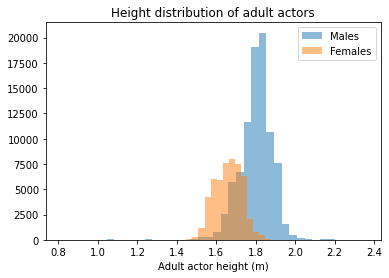

In [40]:
def filter_children(characters):
    LIMIT_CHILDREN_AGE = 14
    return characters[(characters['actor_age_at_movie_release'] > LIMIT_CHILDREN_AGE)]

def characters_height_histogram(characters, bins):
    characters_height = characters.dropna(subset=['actor_height_meters'])
    plt.hist(characters_height['actor_height_meters'],bins=bins, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Adult actor height (m)')
    plt.title('Height distribution of adult actors')

characters_height_histogram(filter_children(characters_male), bins=40)
characters_height_histogram(filter_children(characters_female), bins=25)


Another important characteristic we can study is the age on movie release. Again, there is a huge difference between women and men. Women play roles when they are younger, while men seem to have longer careers.

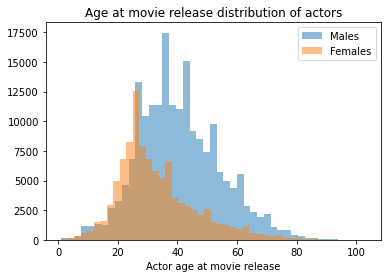

In [41]:
def characters_age_histogram(characters):
    characters_age = characters.dropna(subset=['actor_age_at_movie_release']).sort_values(by=['actor_age_at_movie_release'])
    characters_age = characters_age[characters_age['actor_age_at_movie_release'] > 0]
    plt.hist(characters_age['actor_age_at_movie_release'], bins=45, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Actor age at movie release')
    plt.title('Age at movie release distribution of actors')

characters_age_histogram(characters_male)
characters_age_histogram(characters_female)

The following plot shows the ethnicity distribution for actors and actresses of the dataset. It can be seen how white people clearly dominate the characters dataset by more than a half of it. Indians are also a big group representing 1/4 of the ethnicities. In this case, the difference between genders is not that big.

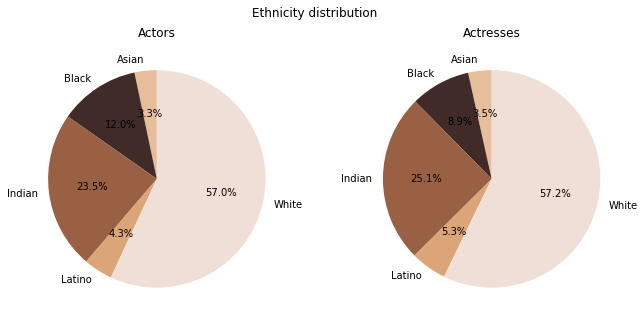

In [42]:
def pie_chart_actor_ethnicities(actors, title, ax):
    actors_ethnicity = actors.dropna(subset=['major_ethnicity'])
    actors_ethnicity = actors_ethnicity[actors_ethnicity['major_ethnicity'] != 'unknown']
    ethnicities, counts = np.unique(actors_ethnicity['major_ethnicity'], return_counts=True)
    #print(np.sort(counts))
    others_count = 0
    plot_ethnicities = []
    plot_counts = []
    ETHNICITY_THRESHOLD = 1
    for ethnicity, count in zip(ethnicities, counts):
        if count > ETHNICITY_THRESHOLD:
            plot_ethnicities.append(ethnicity)
            plot_counts.append(count)
        else:
            others_count += count

    colors = ['#e8bd9b','#402b28','#996044','#dba577','#f0dfd7']

    ax.pie(plot_counts, labels=plot_ethnicities, startangle=90,autopct='%1.1f%%',colors=colors, radius=1)
    ax.set_title(title)

def two_pie_charts_actor_ethnicities(actors1, actors2, title, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_facecolor('white')
    fig.set_size_inches(11, 5)
    fig.suptitle(title)

    pie_chart_actor_ethnicities(actors1, title1, ax1)
    pie_chart_actor_ethnicities(actors2, title2, ax2)
    plt.show()


two_pie_charts_actor_ethnicities(characters_male, 
                                 characters_female, 
                                 title='Ethnicity distribution', 
                                 title1='Actors', 
                                 title2='Actresses')

The next plot shows the number of different ethnicities per movie. For instance, a movie that includes at least one Indian and one Black actress has 2 different ethnicities. As we can see, the vast majority of the films only have one ethnicity on it.

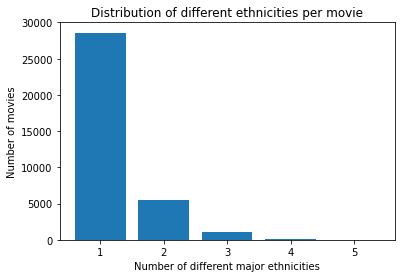

In [51]:
def plot_different_ethnicities_per_movie(characters):
    ethnicity_characters = characters.dropna(subset=['major_ethnicity'])
    num_different_ethnicities = ethnicity_characters.groupby(by=['freebase_movie_id'])['major_ethnicity'].nunique()
    num_ethnicies, count = np.unique(num_different_ethnicities, return_counts=True)
    plt.bar(num_ethnicies, count)
    plt.xlabel('Number of different major ethnicities')
    plt.ylabel('Number of movies')
    plt.title('Distribution of different ethnicities per movie')
plot_different_ethnicities_per_movie(characters)

Since now, we have been working using all the characters in the dataset, even if the same actor played more than one. Now, let's focus on actors instead of characters to figure out the success associated to the professional. First we create an actors dataset. We also compute in how many films in the dataset the actor appears, this value can be found in the column `num_movies`

In [45]:
actors = characters[['freebase_actor_id', 'freebase_movie_id', 'actor_name', 'actor_gender', 'actor_height_meters', 'ethnicity_label', 'major_ethnicity']]
actors = actors.dropna(subset=['freebase_actor_id'])
actors['num_movies'] = actors.groupby(by=['freebase_actor_id'])['freebase_actor_id'].transform('size')
actors.drop('freebase_movie_id', axis=1, inplace=True)
actors.drop_duplicates(subset=['freebase_actor_id'], inplace=True)
actors.head(5)

freebase_actor_id          actor_name actor_gender  actor_height_meters  \
0        /m/03wcfv7      Wanda De Jesus            F                1.620   
1         /m/0346l4  Natasha Henstridge            F                1.780   
2        /m/01vw26l            Ice Cube            M                1.727   
3         /m/034hyc       Jason Statham            M                1.750   
4         /m/01y9xg         Clea DuVall            F                1.650   

     ethnicity_label major_ethnicity  num_movies  
0                NaN             NaN           8  
1            unknown             NaN          23  
2  African Americans           Black          33  
3                NaN             NaN          31  
4                NaN             NaN          31

Again, let's split actors in genders

In [46]:
actors_male = actors[actors['actor_gender'] == 'M']
actors_female = actors[actors['actor_gender'] == 'F']

And now we can focus on the actors that have appeared in a greater number of movies. We fix this threshold at 15 movies.

In [47]:
def get_most_demanded_actors(actors, min_num_movies):
    return actors[actors['num_movies'] >= min_num_movies]

MIN_NUM_MOVIES_DEMANDED_ACTOR = 15
demanded_actors_male = get_most_demanded_actors(actors_male, MIN_NUM_MOVIES_DEMANDED_ACTOR)
demanded_actors_female = get_most_demanded_actors(actors_female, MIN_NUM_MOVIES_DEMANDED_ACTOR)


This way, we can compare if the most characteristic features of each actor are the same for the whole dataset of characters. We are plotting again the height distribution both for males and females.

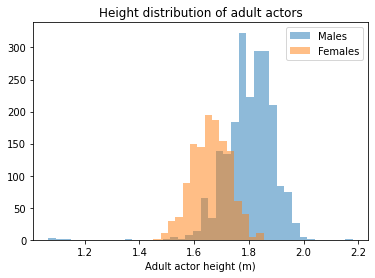

In [48]:
characters_height_histogram(demanded_actors_male, 40)
characters_height_histogram(demanded_actors_female, 15)

Also, the ethnicities are plotted again. We can observe that discriminations are even bigger.

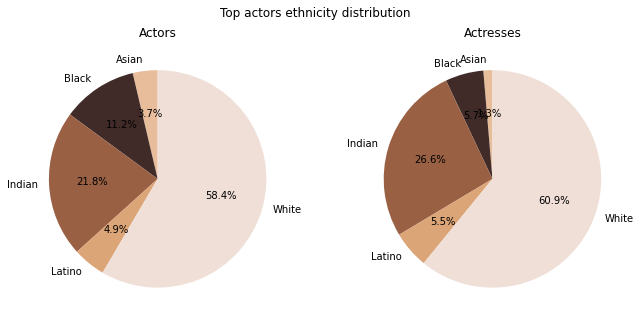

In [49]:
two_pie_charts_actor_ethnicities(demanded_actors_male, 
                                 demanded_actors_female, 
                                 title='Top actors ethnicity distribution', 
                                 title1='Actors', 
                                 title2='Actresses')

All these data about characters is going to be merged and analysed for the last milestone. By now, we have demonstrated that we have data enough to work and answer the proper questions

## What genres are the most profitable?

In [ ]:
df_all['profit_modified'].plot(kind='hist', logy=True, histtype='step', title='Movie profit distribution');

In [ ]:
df_all['genre1'] = df_all['genre'].apply(lambda el: el[0])

In [ ]:
genres = df_all['genre1'].value_counts()

In [ ]:
genres[genres > 700].plot(kind='bar', title='Movie genres distribution');

In [ ]:
plt.figure(figsize=(15,5));
ax = sns.barplot(
    x="genre1",
    y="profit_modified",
    data=df_all[df_all['profit_modified'].notna() & df_all['genre1'].isin(genres[genres > 700].index.to_list())],
    palette='crest'
)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Success of Movie based on genre in terms of the profit', fontsize=14)
_ = plt.xticks(rotation=90)

## correlation between the choice of topics and movie profitability can be investigated

In [ ]:
df_all['genre1_category'] = df_all['genre1'].astype('category').cat.codes

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_all.corr(), annot=True, ax=ax).set(title='Heat map of correlations between different movie features');

## Clustering between movies: Classics VS forgettable : check with wikipedia ID how much it is visited : time series of access 

In [ ]:
wikipedia_pageviews.sample(5)

In [ ]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Spy Kids'].plot(x='date', y='pageviews', title='Pageviews for Spy Kids')

In [ ]:
wikipedia_pageviews[wikipedia_pageviews['name'] == 'Avengers: Endgame'].plot(x='date', y='pageviews', logy=True, title='Pageviews for Avengers: Endgame')

In [ ]:
df_all.sample(5)

In [ ]:
df_all.columns

In [ ]:
df_all['release_year'] = df_all['release_year'].astype(np.int64)

In [ ]:
mod = smf.ols(formula='pageviews ~ release_year + runtime + WR + Director + Star1 + Star2 + Star3 + Star4 + Gross + profit + genre1', data=df_all[df_all['release_year'] < (2015-15)])
np.random.seed(2)
res = mod.fit()
res.summary()